## Twitter Sentiment Analysis

In [34]:
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [35]:
import pandas as pd

splits = {"train": "train.csv", "test": "test.csv"}
df = pd.read_csv(
    "hf://datasets/gxb912/large-twitter-tweets-sentiment/" + splits["train"]
)

In [36]:
df = df[:110_000]
df.shape

(110000, 2)

In [37]:
tweets = df

In [38]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  110000 non-null  int64 
 1   text       110000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [39]:
tweets.shape

(110000, 2)

In [40]:
tweets["sentiment"] = tweets["sentiment"].apply(lambda x: -1 if x == 0 else x)

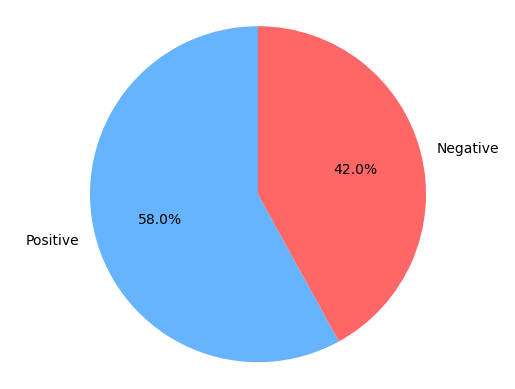

In [41]:
labels = ["Positive", "Negative"]
sizes = [len(tweets[tweets["sentiment"] == 1]), len(tweets[tweets["sentiment"] == -1])]
colors = ["#66b3ff", "#ff6666"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

In [42]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """

    stemmer = WordNetLemmatizer()
    stopwords_english = stopwords.words("english")

    tweet = re.sub(r"\$\w*", "", tweet)
    tweet = re.sub(r"^RT[\s]+", "", tweet)
    tweet = re.sub(r"https?://[^\s\n\r]+", "", tweet)
    tweet = re.sub(r"#", "", tweet)

    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if word not in stopwords_english and word not in string.punctuation:
            stem_word = stemmer.lemmatize(word)
            tweets_clean.append(stem_word)
    return tweets_clean

In [43]:
tweet_text = tweets.loc[2, "text"]

print(tweet_text)
print(" ".join(process_tweet(tweet_text)))

The man who rendered his voice to Mickey Mouse expired. He was 62 years old!  i'm a Mickey fan!
man rendered voice mickey mouse expired 62 year old i'm mickey fan


In [44]:
tweets["text"] = tweets["text"].apply(lambda x: process_tweet(x))
tweets["text"] = tweets["text"].apply(lambda x: " ".join(x))

processed_df = tweets
processed_df.head()

,sentiment,text
0,1,love tooo tg lol gngb
1,-1,told click link booohooo
2,-1,man rendered voice mickey mouse expired 62 yea...
3,1,think red would nice maybe could mix red black
4,-1,guess cause one tweet say confused


In [45]:
for i in range(5):
    print(processed_df.loc[i]["text"], "\n")

love tooo tg lol gngb 

told click link booohooo 

man rendered voice mickey mouse expired 62 year old i'm mickey fan 

think red would nice maybe could mix red black 

guess cause one tweet say confused 



In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 3))
X = vectorizer.fit_transform(processed_df["text"])
y = tweets["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [47]:
tweets["sentiment"].value_counts()

sentiment
 1    63802
-1    46198
Name: count, dtype: int64

In [48]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7586969696969696


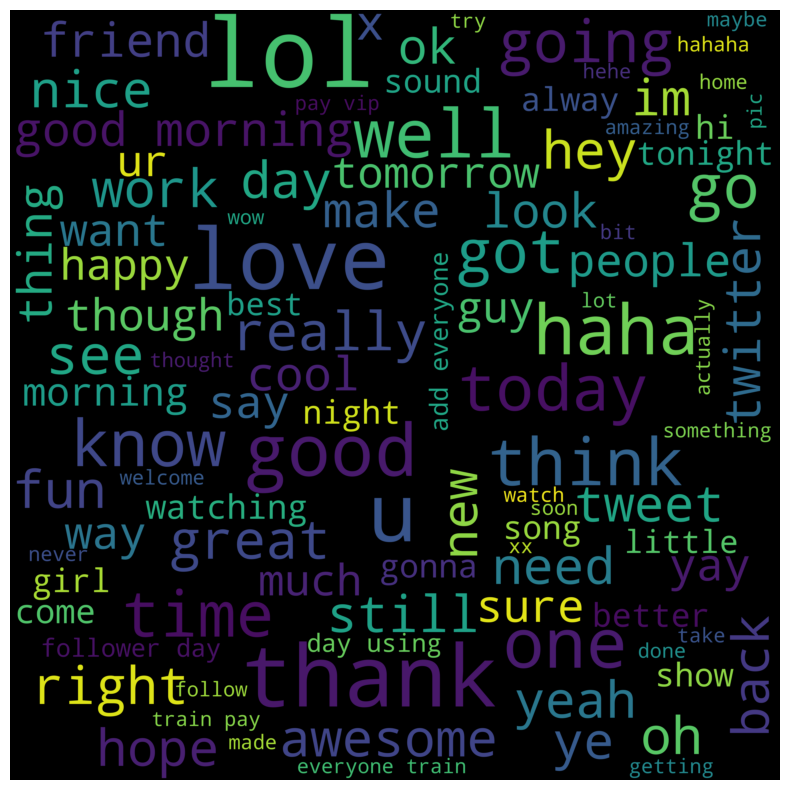

In [49]:
word_cloud_text = " ".join(processed_df[processed_df["sentiment"] == 1]["text"])

if not word_cloud_text.strip():
    print("No positive sentiments found in the dataset.")
else:
    wordcloud = WordCloud(
        max_font_size=100,
        max_words=100,
        background_color="black",
        scale=10,
        width=800,
        height=800,
    ).generate(word_cloud_text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

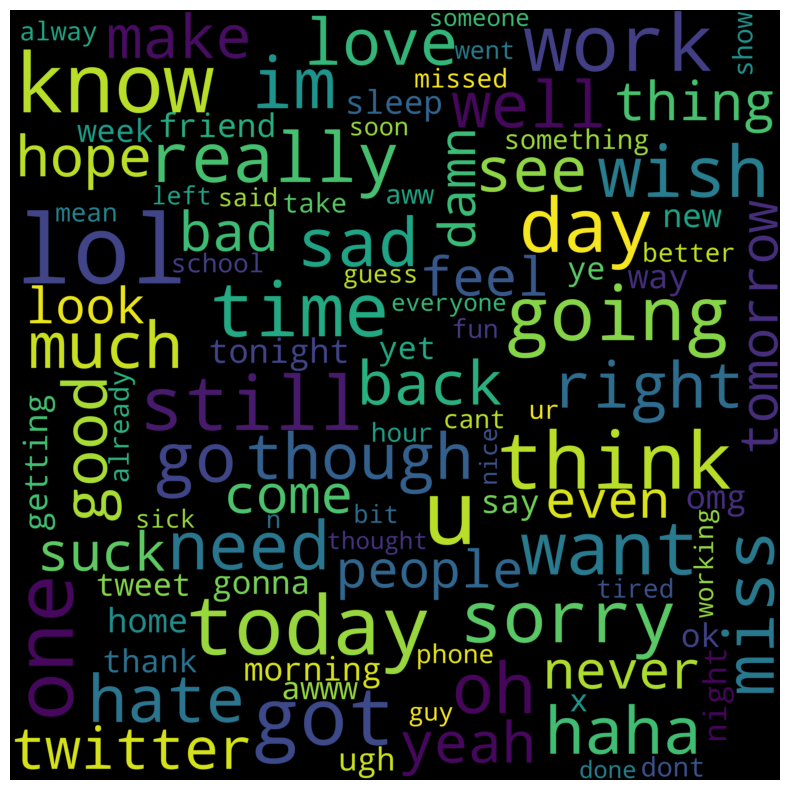

In [50]:
word_cloud_text = " ".join(processed_df[processed_df["sentiment"] == -1]["text"])

if not word_cloud_text.strip():
    print("No negative sentiments found in the dataset.")
else:
    wordcloud = WordCloud(
        max_font_size=100,
        max_words=100,
        background_color="black",
        scale=10,
        width=800,
        height=800,
    ).generate(word_cloud_text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [51]:
new_tweets = [
    "@TechieTom Just finished a deep dive into ML algorithms. Excited to apply what I have learned! #AI #DataScience",
    "@DataNerd99 Exploring data visualization today. Amazing how a good graph tells a story—feeling inspired! #DataViz #Python",
    "@FlutterFan23 Who else is using Flutter? Love how easy it is to create beautiful UIs! #AppDev",
    "@CodingChick Had a productive study session. Ready to tackle algorithms next week! #ComputerScience",
    "@MLJourney Reading 'Hands-On ML' and feeling inspired. Can not wait to implement more projects! #ML #Learning",
    "@CoffeeCoder Coffee and coding are the best combo. What is your study fuel? #StudentLife",
    "@ResearchRover Just submitted my research proposal. Nervous but hopeful! #Research #AcademicLife",
    "@DataExplorer Learning about EDA in ML projects. Data speaks for itself—such an eye-opener! #DataScience",
    "@StudyBuddy21 Summer break is almost over. Excited but anxious for new challenges! #BackToSchool",
    "@LanguageLover Trying to improve my English. Feeling overwhelmed—any tips? #LanguageLearning",
    "@TitanicDataPro Completed a project using the Titanic dataset. Proud of my progress with pandas! #DataScience",
    "@MusicForCoders Looking for new music to code to. Feeling stuck—recommendations? #Music #Coding",
    "@FinanceDev Excited to start my financial literacy app. Empowering students feels rewarding! #FinTech #AppDev",
    "@LatexLearner Spent the day learning LaTeX. Feeling accomplished but have more to learn! #AcademicLife #Writing",
    "@RainyDayCoder Enjoying the rainy vibes while working on projects. Hope it does not distract me too much! #Philippines #Productivity",
]

processed_tweet = [" ".join(process_tweet(tweet)) for tweet in new_tweets]

test_utterances_tfidf = vectorizer.transform(processed_tweet)
predictions = model.predict(test_utterances_tfidf)

print(predictions)

[ 1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1]


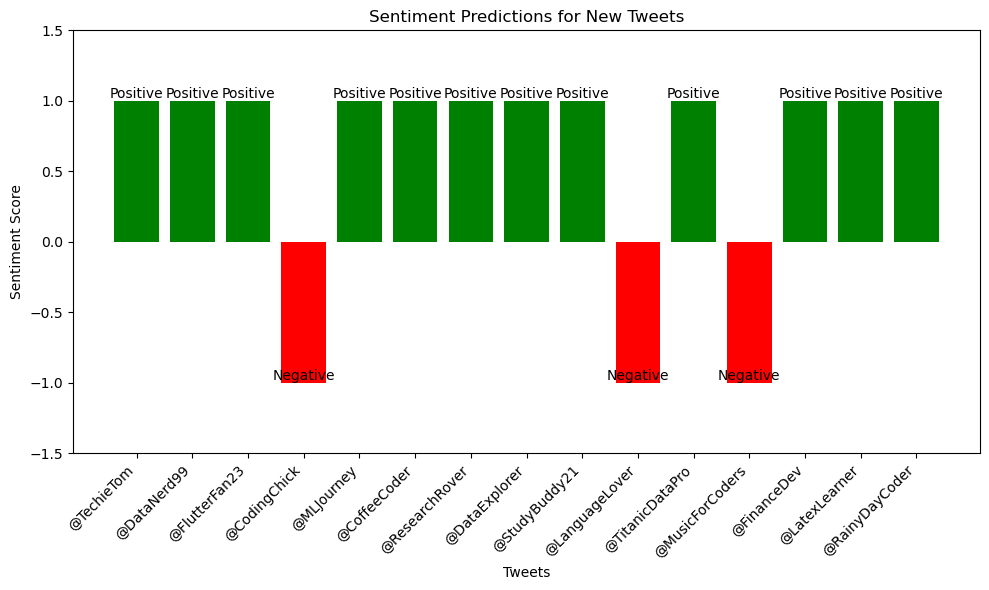

In [52]:
tweet_categories = [
    "@TechieTom",
    "@DataNerd99",
    "@FlutterFan23",
    "@CodingChick",
    "@MLJourney",
    "@CoffeeCoder",
    "@ResearchRover",
    "@DataExplorer",
    "@StudyBuddy21",
    "@LanguageLover",
    "@TitanicDataPro",
    "@MusicForCoders",
    "@FinanceDev",
    "@LatexLearner",
    "@RainyDayCoder",
]


sentiment_labels = {1: "Positive", -1: "Negative"}


plt.figure(figsize=(10, 6))
bars = plt.bar(
    tweet_categories,
    predictions,
    color=[
        "green" if pred == 1 else "gray" if pred == 0 else "red" for pred in predictions
    ],
)


for bar, prediction in zip(bars, predictions):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        sentiment_labels[prediction],
        ha="center",
        va="bottom",
    )


plt.title("Sentiment Predictions for New Tweets")
plt.xlabel("Tweets")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45, ha="right")

plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.show()

In [53]:
print(f"First 5 new tweets:\n")
for _ in range(5):
    print(new_tweets[_])

First 5 new tweets:

@TechieTom Just finished a deep dive into ML algorithms. Excited to apply what I have learned! #AI #DataScience
@DataNerd99 Exploring data visualization today. Amazing how a good graph tells a story—feeling inspired! #DataViz #Python
@FlutterFan23 Who else is using Flutter? Love how easy it is to create beautiful UIs! #AppDev
@CodingChick Had a productive study session. Ready to tackle algorithms next week! #ComputerScience
@MLJourney Reading 'Hands-On ML' and feeling inspired. Can not wait to implement more projects! #ML #Learning


In [54]:
print(f"First 5 processed new tweets:\n")
for _ in range(5):
    print(processed_tweet[_])

First 5 processed new tweets:

finished deep dive ml algorithm excited apply learned ai datascience
exploring data visualization today amazing good graph tell story — feeling inspired dataviz python
else using flutter love easy create beautiful uis appdev
productive study session ready tackle algorithm next week computerscience
reading hands-on ml feeling inspired wait implement project ml learning
